In [1]:
import numpy as np
import pandas as pd

In [2]:
#travel times table
columbus = {'Peoria':4, 'Ft_Wayne':2.5, 'Milwaukee':5, 'Columbus':3, 'Ann_Arbor':5}
evansville = {'Peoria':4.75, 'Ft_Wayne':4.75, 'Milwaukee':6.5, 'Columbus':5, 'Ann_Arbor':7}
fort_wayne = {'Peoria':5, 'Ft_Wayne':0, 'Milwaukee':4.5, 'Columbus':2.75, 'Ann_Arbor':2.5}
anderson = {'Peoria':4, 'Ft_Wayne':1.5, 'Milwaukee':4.75, 'Columbus':2.75, 'Ann_Arbor':3.5}

travel_times = pd.DataFrame([columbus, evansville, fort_wayne, anderson], index = ['Columbus', 'Evansville', 'Fort_wayne', 'Anderson'])
travel_times

,Peoria,Ft_Wayne,Milwaukee,Columbus,Ann_Arbor
Columbus,4.00,2.50,5.00,3.00,5.0
Evansville,4.75,4.75,6.50,5.00,7.0
Fort_wayne,5.00,0.00,4.50,2.75,2.5
Anderson,4.00,1.50,4.75,2.75,3.5


## MiniMax Location Algorithm

In [3]:
minimax = {'Peoria':[travel_times['Peoria'].max()], 'Ft_Wayne':[travel_times['Ft_Wayne'].max()], 'Milwaukee':[travel_times['Milwaukee'].max()], 'Columbus':[travel_times['Columbus'].max()], 'Ann_Arbor':[travel_times['Ann_Arbor'].max()]}

minimax = pd.DataFrame(minimax, columns = ['Peoria', 'Ft_Wayne', 'Milwaukee', 'Columbus', 'Ann_Arbor'], index = ['max_travel'] )
minimax = minimax.sort_values(by=['max_travel'], axis=1)
minimax.loc['rank'] = [1, 2, 3, 4, 5]
minimax

,Ft_Wayne,Peoria,Columbus,Milwaukee,Ann_Arbor
max_travel,4.75,5.0,5.0,6.5,7.0
rank,1.00,2.0,3.0,4.0,5.0


## MaxMin Location Algorithm

In [4]:
maxmin = {'Peoria':[travel_times['Peoria'].min()], 'Ft_Wayne':[travel_times['Ft_Wayne'].min()], 'Milwaukee':[travel_times['Milwaukee'].min()], 'Columbus':[travel_times['Columbus'].min()], 'Ann_Arbor':[travel_times['Ann_Arbor'].min()]}
maxmin = pd.DataFrame(maxmin, columns = ['Peoria', 'Ft_Wayne', 'Milwaukee', 'Columbus', 'Ann_Arbor'], index = ['min_travel'] )
maxmin = maxmin.sort_values(by=['min_travel'], axis=1)
maxmin.loc['rank'] = [1, 2, 3, 4, 5]
maxmin

,Ft_Wayne,Ann_Arbor,Columbus,Peoria,Milwaukee
min_travel,0.0,2.5,2.75,4.0,4.5
rank,1.0,2.0,3.00,4.0,5.0


In [5]:
ent_act = {'weight':0.35, 'Peoria':53, 'Ft_Wayne':75, 'Milwaukee':95, 'Columbus':94, 'Ann_Arbor':66}
sb_growth = {'weight':0.15, 'Peoria':85.5, 'Ft_Wayne':85, 'Milwaukee':89.7, 'Columbus':86, 'Ann_Arbor':89.2}
hire_pool = {'weight':0.10, 'Peoria':80, 'Ft_Wayne':68, 'Milwaukee':62, 'Columbus':78.5, 'Ann_Arbor':98}
cost_living = {'weight':0, 'Peoria':98.86, 'Ft_Wayne':99.77, 'Milwaukee':91.71, 'Columbus':95.34, 'Ann_Arbor':85.33}
percent_fact = {'weight':0.2, 'Peoria':71, 'Ft_Wayne':100, 'Milwaukee':87.5, 'Columbus':48, 'Ann_Arbor':47.5}
total_travel = {'weight':0.1, 'Peoria':travel_times['Peoria'].sum(), 'Ft_Wayne':travel_times['Ft_Wayne'].sum(), 'Milwaukee':travel_times['Milwaukee'].sum(), 'Columbus':travel_times['Columbus'].sum(), 'Ann_Arbor':travel_times['Ann_Arbor'].sum()}
max_travel = {'weight':0.1, 'Peoria':travel_times['Peoria'].max(), 'Ft_Wayne':travel_times['Ft_Wayne'].max(), 'Milwaukee':travel_times['Milwaukee'].max(), 'Columbus':travel_times['Columbus'].max(), 'Ann_Arbor':travel_times['Ann_Arbor'].max()}

In [6]:
location_factor = pd.DataFrame([ent_act, sb_growth, hire_pool, percent_fact, total_travel, max_travel], index = ['Entrepreneurial Activity', 'Small Business Growth', 'Quality of Hiring Pool', 'Percent of Workforce in Manufacturing', 'Total Travel Time', 'Max Travel Time'])
location_factor

,weight,Peoria,Ft_Wayne,Milwaukee,Columbus,Ann_Arbor
Entrepreneurial Activity,0.35,53.00,75.00,95.00,94.0,66.0
Small Business Growth,0.15,85.50,85.00,89.70,86.0,89.2
Quality of Hiring Pool,0.10,80.00,68.00,62.00,78.5,98.0
Percent of Workforce in Manufacturing,0.20,71.00,100.00,87.50,48.0,47.5
Total Travel Time,0.10,17.75,8.75,20.75,13.5,18.0
Max Travel Time,0.10,5.00,4.75,6.50,5.0,7.0


## Sensitivity Analysis

In [7]:
def sensitivityAnalysis(num_samples, mean, stdev):
    return(np.random.normal(loc = mean, scale = stdev, size = num_samples))

In [8]:
def scoreDistribution(city, num_samples):
    ent_act = [0.35 * i for i in sensitivityAnalysis(num_samples, location_factor.loc['Entrepreneurial Activity',city], 13)]
    sb_growth = [0.15 * i for i in sensitivityAnalysis(num_samples, location_factor.loc['Small Business Growth',city], 1)]
    hire_pool = [0.1 * i for i in sensitivityAnalysis(num_samples, location_factor.loc['Quality of Hiring Pool',city], 15)]
    percent_fact = [0.2 * i for i in sensitivityAnalysis(num_samples, location_factor.loc['Percent of Workforce in Manufacturing',city], 4)]
    total_travel = [-10/22 * i for i in sensitivityAnalysis(num_samples, location_factor.loc['Total Travel Time', city], 0.25)]
    max_travel = [-10/7.5 * i for i in sensitivityAnalysis(num_samples, location_factor.loc['Max Travel Time', city], 0.25)]
    listoflists = [ent_act, sb_growth, hire_pool, percent_fact, total_travel, max_travel]
    out = [sum(x) for x in zip(*listoflists)]
    return(out)

### Plotting Data

In [9]:
num_samples = 120
plotData = pd.DataFrame([scoreDistribution('Peoria', num_samples), 
                         scoreDistribution('Ft_Wayne', num_samples),
                         scoreDistribution('Milwaukee', num_samples), 
                         scoreDistribution('Columbus', num_samples), 
                         scoreDistribution('Ann_Arbor', num_samples)], 
                       index = ['Peoria', 'Ft_Wayne', 'Milwaukee', 'Columbus', 'Ann_Arbor'])
plotData = plotData.transpose()
plotData.head()

,Peoria,Ft_Wayne,Milwaukee,Columbus,Ann_Arbor
0,44.254047,55.062445,46.319544,49.680278,44.406527
1,38.641333,50.491070,54.378345,48.432876,39.515483
2,41.077713,52.525092,49.708259,50.510444,41.643309
3,38.525516,59.339645,48.205889,57.032937,39.860241
4,40.643868,57.707993,53.538279,54.635947,39.059530


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[Text(20.064999999999998, 0.5, 'Score'), Text(0.5, 15.158750000000019, 'City')]

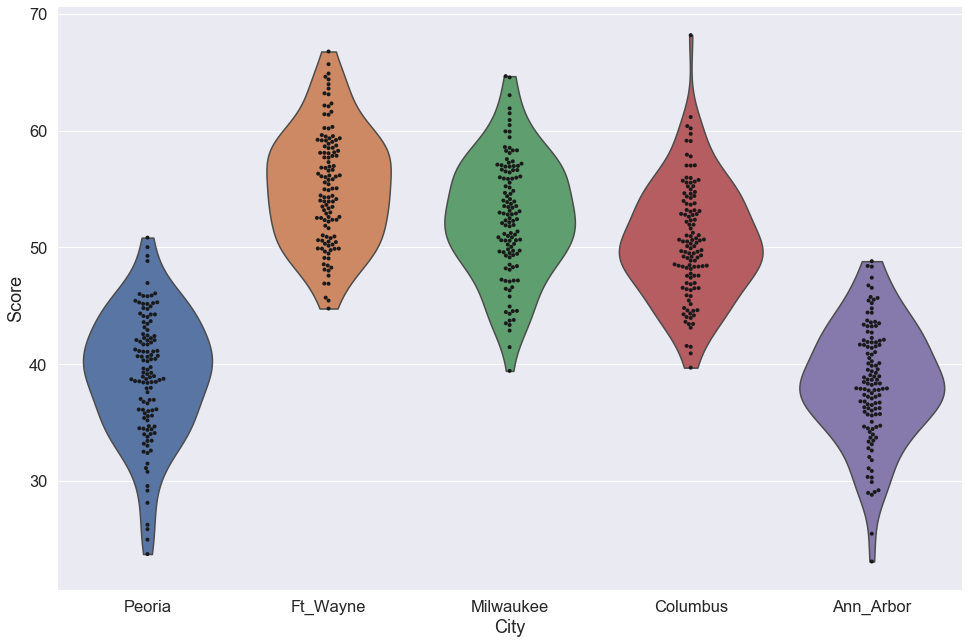

In [11]:
sns.set(font_scale=1.5)
g = sns.catplot( inner=None, kind = 'violin', bw = 0.4, cut = 0, data = plotData, height = 9, aspect = 1.5)
fig = sns.swarmplot( color="k", size=4, data=plotData, ax=g.ax)
fig.set(xlabel='City', ylabel='Score')


### Statistical Tests

In [12]:
from scipy import stats

In [13]:
#2 sample T test

print(stats.ttest_ind(plotData.loc[:,'Ft_Wayne'], plotData.loc[:,'Milwaukee']))
print(stats.ttest_ind(plotData.loc[:,'Ft_Wayne'], plotData.loc[:,'Columbus']))
print(stats.ttest_rel(plotData.loc[:,'Ft_Wayne'], plotData.loc[:,'Ann_Arbor']))
print(stats.ttest_rel(plotData.loc[:,'Ft_Wayne'], plotData.loc[:,'Peoria']))


Ttest_indResult(statistic=4.146616296353754, pvalue=4.695959222163541e-05)
Ttest_indResult(statistic=7.407129123300335, pvalue=2.2309161776771036e-12)
Ttest_relResult(statistic=28.797216873489674, pvalue=1.8162832708177826e-55)
Ttest_relResult(statistic=24.89624694583955, pvalue=5.219034983824616e-49)
